In [12]:
# -*- coding: utf-8 -*-
# Bibliotecas
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy.cluster import hierarchy
from scipy.spatial.distance import chebyshev, cityblock, cosine, euclidean
from scipy.stats import pearsonr
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans, SpectralClustering
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline
DATASETS_DIR = (r"C:\Users\gcres\datasets")

In [13]:
def colorize(data):
    color_palette = ['#910101', '#036CD7', '#078F8F', '#000000', '#FDFD6F', '#B16FFD',
            '#22FF25','#074752', '#8F4A00', '#FE6FB5', '#6BB6FE', '#DF6B00', '#48018D','#FCB5DA']
    labels = np.unique(data)
    
    if len(labels) > len(color_palette):
        color_palette += ["#%06x" % c for c in np.random.randint(0, 0xFFFFFF, len(labels)-len(color_palette))]
    color_array = np.empty(data.shape, dtype=object)
        
    for label, color in zip(labels, color_palette):
        color_array[np.where(data==label)] = color
    return color_array

def load_dataset(dataset_name):
    dataset = pd.read_csv(os.path.join(DATASETS_DIR, dataset_name+'.csv'), sep=';')
    dataset.name = dataset_name
    dataset.n_clusters = dataset['cluster'].nunique()
    return dataset

def plot_multiple_datasets(datasets, nrows, ncols, cluster_labels=None, suptitle=None):
        fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(min(5*ncols, 12), 3*nrows), constrained_layout=True)
        ax = ax.flatten()
        for i, dataset in enumerate(datasets):
            clusters = dataset['cluster'] if cluster_labels is None else cluster_labels[i]
            ax[i].scatter(dataset['d1'], dataset['d2'], s=10, c=colorize(clusters))
            ax[i].set_title('{0} - {1} clusters'.format(dataset.name, len(np.unique(clusters))))
            ax[i].tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
        if suptitle is not None:
            fig.suptitle(suptitle, fontsize=16)
        plt.show()

def plot_multiple_partitions(dataset, cluster_labels, nrows, ncols, suptitle=None, subtitles=None):
        fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(min(5*ncols, 12), 3*nrows), constrained_layout=True)
        ax = ax.flatten()
        for i, clusters in enumerate(cluster_labels):
            ax[i].scatter(dataset['d1'], dataset['d2'], s=10, c=colorize(clusters))
        if subtitles is not None:
            ax[i].set_title(subtitles[i])
            ax[i].tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
        if suptitle is not None:
            fig.sup

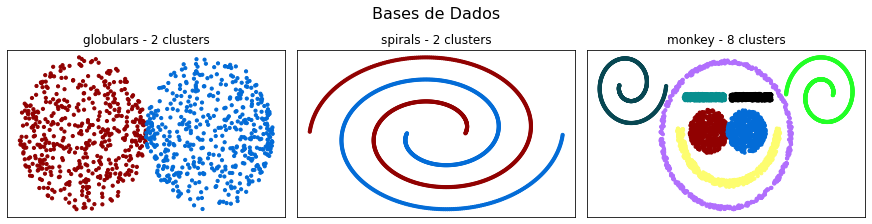

In [14]:
globulars, spirals, monkey = load_dataset('globulars'), load_dataset('spirals'), load_dataset('monkey')
datasets = [globulars, spirals, monkey]
plot_multiple_datasets(datasets, suptitle='Bases de Dados', nrows=1, ncols=3)

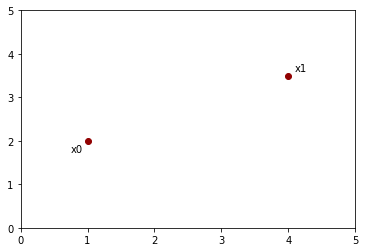

In [15]:
x = np.array([[1.0, 2.0],
 [4.0, 3.5]])
fig, ax = plt.subplots()
ax.scatter(x[:,0], x[:,1], c='#910101')
ax.annotate('x0', x[0] - 0.25)
ax.annotate('x1', x[1] + 0.10)
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
plt.show()

In [16]:
#--------------------------------------------------------------------------------------------------
# MEDIDADES DE DISTÂNCIA
manhattan_dist = cityblock(x[0], x[1])
euclidian_dist = euclidean(x[0], x[1])
chebyshev_dist = chebyshev(x[0], x[1])
print('Medidas de Proximidade')
print('\tDistância de Manhattan: {:.3f}'.format(manhattan_dist))
print('\tDistância Euclidiana: {:.3f}'.format(euclidian_dist))
print('\tDistância de Chebyshev: {:.3f}'.format(chebyshev_dist))
print('\n')
#--------------------------------------------------------------------------------------------------
# MEDIDADES DE SIMILARIDADE
cosine_similarity = 1 - cosine(x[0], x[1])
pearson_correlation = pearsonr(x[0], x[1])[0]
print('Medidas de Similaridade')
print('\t\t Cosseno: {:.3f}'.format(cosine_similarity))
print('\t Correlação de Pearson: {:.3f}'.format(pearson_correlation))

Medidas de Proximidade
	Distância de Manhattan: 4.500
	Distância Euclidiana: 3.354
	Distância de Chebyshev: 3.000


Medidas de Similaridade
		 Cosseno: 0.926
	 Correlação de Pearson: -1.000


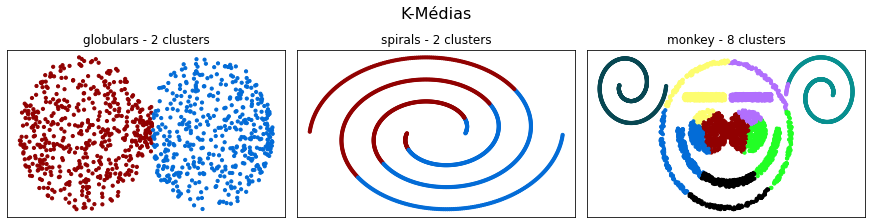

In [17]:
cluster_labels = list()
for dataset in datasets:
    model = KMeans(n_clusters=dataset.n_clusters)
    pred_clusters = model.fit_predict(dataset[['d1', 'd2']])
    cluster_labels.append(pred_clusters)

plot_multiple_datasets(datasets, cluster_labels=cluster_labels, suptitle='K-Médias', nrows=1, ncols=3)

Amostras do cluster 0
[[2 6]
 [1 9]
 [2 8]
 [3 7]]
Centróide:  [2.  7.5] 

Amostras do cluster 1
[[8 6]
 [8 8]
 [7 7]
 [7 5]]
Centróide:  [7.5 6.5] 



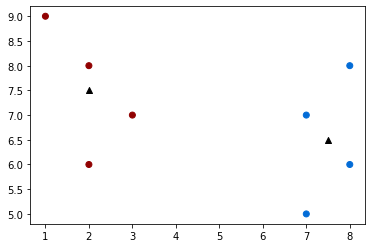

In [18]:
x, y = make_blobs(n_samples=8, cluster_std=1, random_state=20, centers=2)
x = np.round(x).astype(int)
print('Amostras do cluster 0')
print(x[np.where(y==0)])
print('Centróide: ', np.mean(x[np.where(y==0)], axis=0), '\n')
print('Amostras do cluster 1')
print(x[np.where(y==1)])
print('Centróide: ', np.mean(x[np.where(y==1)], axis=0), '\n')
centroids = np.vstack([np.mean(x[np.where(y==0)], axis=0), np.mean(x[np.where(y==1)], axis=0)])
plt.scatter(x[:,0], x[:,1], c=colorize(y))
plt.scatter(centroids[:, 0], centroids[:, 1], c='Black', marker='^')
plt.show()

In [41]:
from sklearn.metrics.cluster import adjusted_rand_score

def evaluate_clusters(dataset, clusters_sizes):
    score_results = dict()
    cluster_labels = list()
    subtitles = list()
    for n_clusters in clusters_sizes:
        score_results[n_clusters] = dict()
        models = [('K-Médias', KMeans(n_clusters=n_clusters))]

        for model_name, model in models:
            pred_clusters = model.fit_predict(dataset[['d1', 'd2']])
            cluster_labels.append(pred_clusters)
            ari = adjusted_rand_score(dataset['cluster'], pred_clusters)

            subtitles.append('{} - {} clusters\n ARI = {:.3f}'.format(model_name, n_clusters, ari))

            score_results[n_clusters][model_name] = {'Ind. Rand Corrigido (ARI)': ari}

    plot_multiple_partitions(dataset, cluster_labels=cluster_labels, nrows=len(clusters_sizes), ncols=1, subtitles=subtitles)

    results_table = pd.DataFrame.from_dict({(i,j): score_results[i][j] for i in score_results.keys() for j in score_results[i].keys()}, orient='index')
    return results_table

,,Ind. Rand Corrigido (ARI)
2,K-Médias,0.887252
3,K-Médias,0.439063
4,K-Médias,0.443995
5,K-Médias,0.289754


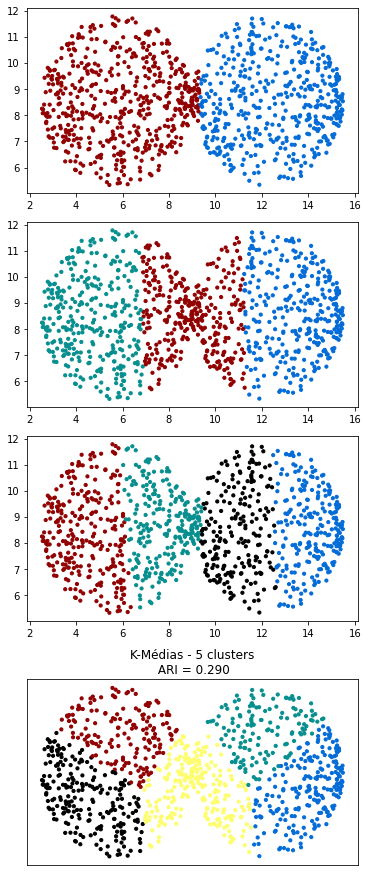

In [42]:
results_globulars = evaluate_clusters(dataset=globulars, clusters_sizes=range(2, 6))
display(results_globulars)